In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

2023-12-26 19:19:30.801455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 19:19:30.801489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 19:19:30.802504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 19:19:30.809966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 19:19:31.664466: W tensorflow/compiler/tf2

In [2]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_df.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()


In [20]:
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    precision = history.history['precision_1']
    val_precision = history.history['val_precision_1']
    
    recall = history.history['recall_1']
    val_recall = history.history['val_recall_1']
    
    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 3, figsize = (20, 7))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = precision, label='Training Precision', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_precision, label='Validation Precision', ax=ax[1])
    ax2.set(title = 'Precision', xlabel = 'Epochs')
    
    # Plot accuracy
    ax3 = sns.lineplot(x = epochs, y = recall, label='Training Recall', ax= ax[2])
    ax3 = sns.lineplot(x = epochs, y = val_recall, label='Validation Recall', ax=ax[2])
    ax3.set(title = 'Recall', xlabel = 'Epochs')


In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
train_df = train_datagen.flow_from_directory('./PandasBears/Train/',
                                            target_size=(256, 256),
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True,
                                            seed=0)

val_df = train_datagen.flow_from_directory('./PandasBears/Test/',
                                            target_size=(256, 256),
                                            color_mode='rgb',
                                            class_mode='binary',
                                            batch_size=32,
                                            shuffle=True,
                                            seed=0)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
images, labels = train_df.next()
len(images), len(labels), images[0].shape

(32, 32, (256, 256, 3))

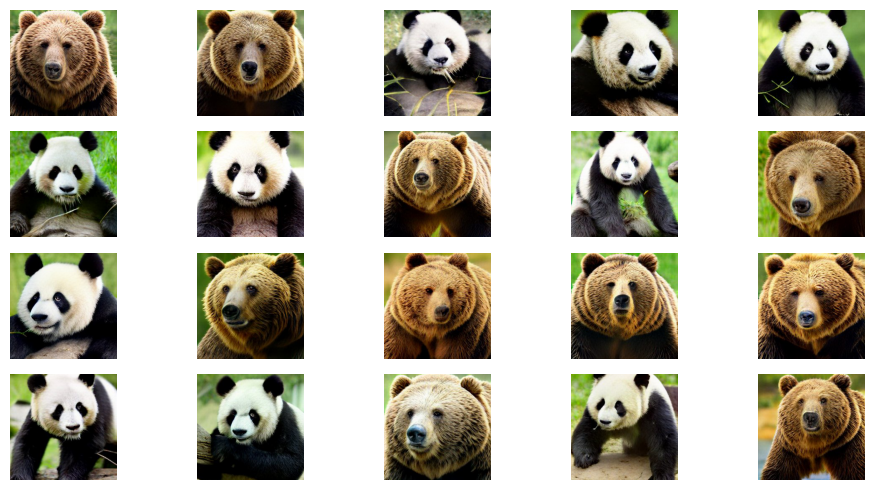

In [7]:
plot_random_images()

### Model 1 - Baseline

In [13]:
metrics = [tf.keras.metrics.Precision(),
          tf.keras.metrics.Recall(),
          tf.keras.metrics.R2Score(),
          tf.keras.metrics.BinaryAccuracy()]

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3),),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)

In [15]:
model.build()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [17]:
history = model.fit(train_df, epochs=5, validation_data=val_df)

Epoch 1/5
16/16 [==============================] - 7s 416ms/step - loss: 0.4536 - precision_1: 0.8135 - recall_1: 0.8200 - r2_score: 0.4799 - binary_accuracy: 0.8160 - val_loss: 0.0224 - val_precision_1: 0.9804 - val_recall_1: 1.0000 - val_r2_score: 0.9812 - val_binary_accuracy: 0.9900
Epoch 2/5
16/16 [==============================] - 6s 384ms/step - loss: 0.0430 - precision_1: 0.9960 - recall_1: 0.9920 - r2_score: 0.9660 - binary_accuracy: 0.9940 - val_loss: 0.0141 - val_precision_1: 1.0000 - val_recall_1: 1.0000 - val_r2_score: 0.9883 - val_binary_accuracy: 1.0000
Epoch 3/5
16/16 [==============================] - 6s 384ms/step - loss: 0.0216 - precision_1: 0.9960 - recall_1: 0.9880 - r2_score: 0.9760 - binary_accuracy: 0.9920 - val_loss: 0.0112 - val_precision_1: 0.9804 - val_recall_1: 1.0000 - val_r2_score: 0.9864 - val_binary_accuracy: 0.9900
Epoch 4/5
16/16 [==============================] - 6s 390ms/step - loss: 0.0166 - precision_1: 0.9960 - recall_1: 0.9960 - r2_score: 0.9872

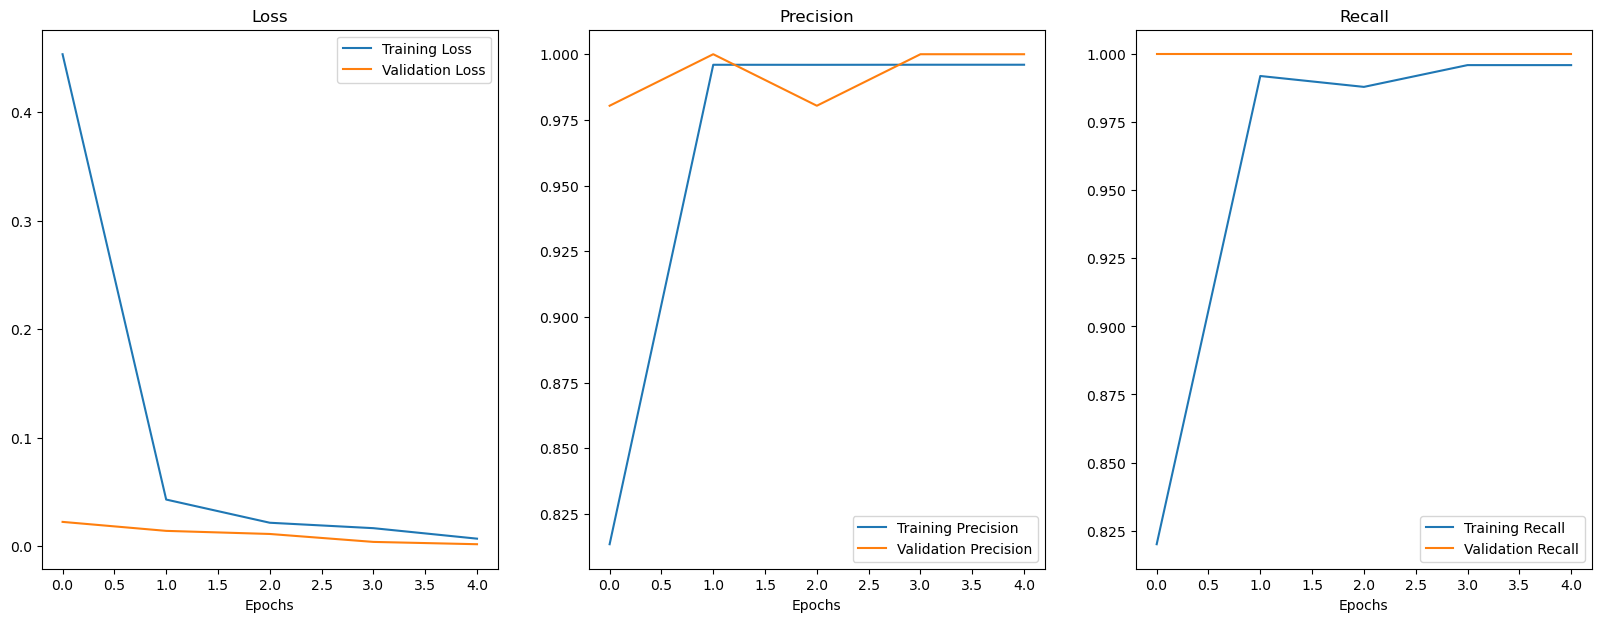

In [21]:
plot_loss_curves(history)